In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image

sns.set_style("darkgrid")


In [4]:
# Load the data
data = pd.read_excel("../data/raw/Generic ED 2009.xlsx", sheet_name = 'Generic ED Data', engine = "openpyxl")

In [5]:
# Preprocessing
data.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619.0,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
1,444991,63193,4,15,2009-01-01 00:35:00,2009-01-01 03:01:00,2009-01-01 07:35:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,420,274.0,9000.0,INJURY,Z53.2,DID NOT WAIT
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0.0,7000.0,EYE,H10.9,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,98,26.0,25000.0,PAIN,H60.9,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,274,119.0,9000.0,INJURY,S83.6,KNEE SPRAIN / STRAIN


In [6]:
data.dtypes

MRN                                               int64
Presentation Visit Number                         int64
Triage Priority                                   int64
 Age  (yrs)                                       int64
Arrival Date                             datetime64[ns]
Dr Seen Date                             datetime64[ns]
Depart Actual Date                       datetime64[ns]
Depart Status Code                               object
Departure Status Desc.                           object
Depart. Dest. Code                               object
Depart. Dest. Desc.                              object
TimeDiff Arrival-Actual Depart (mins)             int64
TimeDiff TreatDrNr-Act. Depart (mins)           float64
Presenting Complaint Code                       float64
Presenting Complaint Desc.                       object
Diag Code                                        object
Diagnosis Desc.                                  object
dtype: object

In [7]:
# Handle missing data
data.isnull().sum()

MRN                                        0
Presentation Visit Number                  0
Triage Priority                            0
 Age  (yrs)                                0
Arrival Date                               0
Dr Seen Date                             184
Depart Actual Date                         0
Depart Status Code                         0
Departure Status Desc.                     0
Depart. Dest. Code                         0
Depart. Dest. Desc.                        0
TimeDiff Arrival-Actual Depart (mins)      0
TimeDiff TreatDrNr-Act. Depart (mins)      1
Presenting Complaint Code                 19
Presenting Complaint Desc.                19
Diag Code                                  0
Diagnosis Desc.                            0
dtype: int64

In [8]:
data.loc[data["Dr Seen Date"].isnull()].head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
46,367128,63393,4,2,2009-01-01 22:42:00,NaT,2009-01-02 00:26:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,104,0.0,6000.0,ENVIRONMENTAL / TEMPERATURE,Z53.2,DID NOT WAIT
74,445062,63569,3,0,2009-01-02 22:35:00,NaT,2009-01-02 23:24:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,49,1.0,24000.0,PAEDIATRIC,Z53.2,DID NOT WAIT
75,315749,63576,4,4,2009-01-02 23:18:00,NaT,2009-01-03 00:08:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,50,0.0,24000.0,PAEDIATRIC,Z53.2,DID NOT WAIT
90,110615,63642,3,13,2009-01-03 10:59:00,NaT,2009-01-03 13:40:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,161,40.0,27000.0,PSYCHIATRIC / BEHAVIOURAL,F91.9,BEHAVIOURAL PROBLEMS - CHILD
121,200843,63808,4,11,2009-01-04 09:31:00,NaT,2009-01-04 09:57:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,26,1.0,9000.0,INJURY,S01.88,LACERATED FACE


Goal of model is to predict how long a pateint is expected to stay after seeing the doctor. Instances where a patient did not wait and left before seeing the doctor are not relevant. These data points will not be included in model

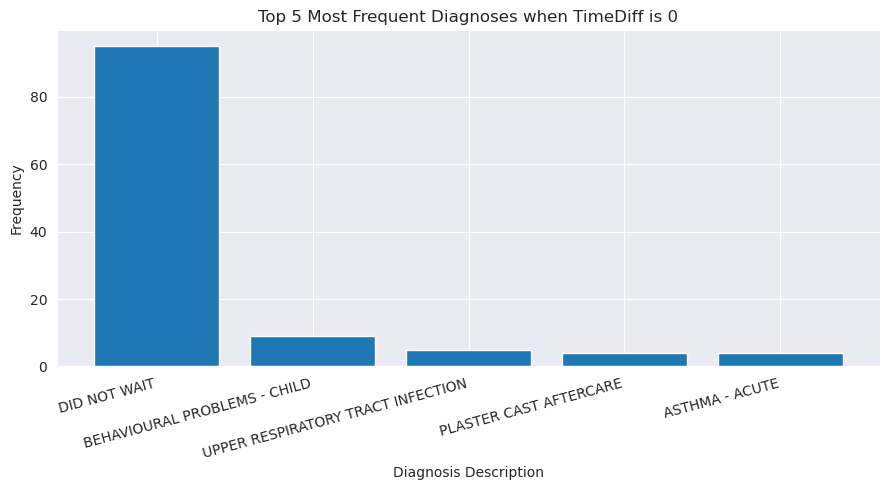

In [9]:
top_diagnosis_counts = data.loc[data["Dr Seen Date"].isnull()]["Diagnosis Desc."].value_counts().head(5)

# Sort the top diagnosis counts in descending order
top_diagnosis_counts = top_diagnosis_counts.sort_values(ascending=False)

# Create a bar plot for the top diagnosis counts
plt.figure(figsize=(9, 5))
plt.bar(top_diagnosis_counts.index, top_diagnosis_counts.values)
plt.xlabel("Diagnosis Description")
plt.ylabel("Frequency")
plt.title("Top 5 Most Frequent Diagnoses when TimeDiff is 0")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()

In [10]:
data = data.loc[~((data["Diagnosis Desc."] == "DID NOT WAIT") | (data["Departure Status Desc."] == "DID NOT WAIT"))]

In [11]:
data.loc[data["Dr Seen Date"].isnull()].head(3)

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
90,110615,63642,3,13,2009-01-03 10:59:00,NaT,2009-01-03 13:40:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,161,40.0,27000.0,PSYCHIATRIC / BEHAVIOURAL,F91.9,BEHAVIOURAL PROBLEMS - CHILD
121,200843,63808,4,11,2009-01-04 09:31:00,NaT,2009-01-04 09:57:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,26,1.0,9000.0,INJURY,S01.88,LACERATED FACE
124,445100,63829,4,15,2009-01-04 12:22:00,NaT,2009-01-04 12:56:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,34,15.0,9000.0,INJURY,T00.9,MULTIPLE SUPERFICIAL INJURIES


Impute missing "Dr Seen Date" by calculating "Depart Actual Date" - "TimeDiff TreatDrNr-Act. Depart (mins)"


In [12]:
# Define a function to calculate the 'Dr Seen Date' based on the formula
def calculate_dr_seen_date(row):
    if pd.isnull(row['Dr Seen Date']):
        return row['Depart Actual Date'] - pd.to_timedelta(row['TimeDiff TreatDrNr-Act. Depart (mins)'], unit='minutes')
    else:
        return row['Dr Seen Date']

# Apply the function to the DataFrame to impute missing 'Dr Seen Date' values
data['Dr Seen Date'] = data.apply(calculate_dr_seen_date, axis=1)
data.isnull().sum()

MRN                                      0
Presentation Visit Number                0
Triage Priority                          0
 Age  (yrs)                              0
Arrival Date                             0
Dr Seen Date                             0
Depart Actual Date                       0
Depart Status Code                       0
Departure Status Desc.                   0
Depart. Dest. Code                       0
Depart. Dest. Desc.                      0
TimeDiff Arrival-Actual Depart (mins)    0
TimeDiff TreatDrNr-Act. Depart (mins)    0
Presenting Complaint Code                3
Presenting Complaint Desc.               3
Diag Code                                0
Diagnosis Desc.                          0
dtype: int64

In [13]:
data.loc[data["Presenting Complaint Code"].isnull()]

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
2488,324268,74422,4,4,2009-03-09 11:06:00,2009-03-09 11:27:00,2009-03-09 15:14:00,A,ADMITTED (EXCL.ED BED),2F,2F - PAEDIATRICS,248,227.0,NaN,NaN,S61.9,LACERATED FINGER
24021,488451,20676,3,3,2010-08-07 19:05:00,2010-08-07 19:27:00,2010-08-07 19:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,25,3.0,NaN,NaN,Z04.3,NO INJURY FOUND
28658,497125,39308,3,15,2010-11-22 17:31:00,2010-11-22 17:31:00,2010-11-22 17:31:00,A,ADMITTED (EXCL.ED BED),2A,2A - MENTAL HEALTH,0,0.0,NaN,NaN,F99,MENTAL ILLNESS - NO DIAGNOSIS


These 3 records where there was not there was no initial complaint made. It seems like there were three invalid occurences where the presenting complaint of the patient was not captured even when they stayed. As these are most likely data entry errors, let's remove these records

In [14]:
data = data.dropna(axis = 0, subset = ["Presenting Complaint Code"])
data = data.dropna(axis = 0, subset = ["Presenting Complaint Desc."])
data.isnull().sum()

MRN                                      0
Presentation Visit Number                0
Triage Priority                          0
 Age  (yrs)                              0
Arrival Date                             0
Dr Seen Date                             0
Depart Actual Date                       0
Depart Status Code                       0
Departure Status Desc.                   0
Depart. Dest. Code                       0
Depart. Dest. Desc.                      0
TimeDiff Arrival-Actual Depart (mins)    0
TimeDiff TreatDrNr-Act. Depart (mins)    0
Presenting Complaint Code                0
Presenting Complaint Desc.               0
Diag Code                                0
Diagnosis Desc.                          0
dtype: int64

In [15]:
data.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619.0,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0.0,7000.0,EYE,H10.9,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,98,26.0,25000.0,PAIN,H60.9,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,274,119.0,9000.0,INJURY,S83.6,KNEE SPRAIN / STRAIN
5,445004,63233,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,109,9.0,9000.0,INJURY,S01.88,LACERATED FACE


There are many fields that tell the same story. For example, departure code and departure description are is giving virtually identical information on the surface. Let's test the dependency of these fields by performing chi square test. Fields that are highly dependent on one another, with a p_value = 0 will be dropped to ensure the independet variables are independent of one another and not adding redundant data to the model 


In [16]:
dependent_pairs = (('Depart Status Code', 'Departure Status Desc.'), ('Presenting Complaint Code', 'Presenting Complaint Desc.'), ('Diag Code', 'Diagnosis Desc.'))

for pair in dependent_pairs:
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])

    # Perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(p_value)



0.0
0.0
0.0


In [17]:
data = data.drop(["Depart. Dest. Desc.", "Presenting Complaint Code", "Diag Code", "Depart Status Code"], axis = 1)


In [18]:
data.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,733,619.0,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,98,26.0,PAIN,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,274,119.0,INJURY,KNEE SPRAIN / STRAIN
5,445004,63233,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,109,9.0,INJURY,LACERATED FACE


"MRN" and "Presentation" don't add any useful information to the data. They are just unique identifiers for patients and visits. Let's verify this before removing these fields. 

In [19]:
data = data.drop(["MRN", "Presentation Visit Number"], axis = 1)

In [20]:
data.head()

,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.
0,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,733,619.0,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS
2,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS
3,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,98,26.0,PAIN,OTITIS EXTERNA
4,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,274,119.0,INJURY,KNEE SPRAIN / STRAIN
5,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,109,9.0,INJURY,LACERATED FACE


There is the time difference between arrival to departure and when a pateint saw the doctor to departure. However, there is no field representing when the duration of time between arrival to seeing a doctor. 

In [21]:
# Feature Engineering
data["TimeDiff Arrival-TreatDrNr (mins)"] = data["TimeDiff Arrival-Actual Depart (mins)"] - data["TimeDiff TreatDrNr-Act. Depart (mins)"]

In [22]:
data.head()

,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.,TimeDiff Arrival-TreatDrNr (mins)
0,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,733,619.0,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS,114.0
2,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS,13.0
3,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,98,26.0,PAIN,OTITIS EXTERNA,72.0
4,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,274,119.0,INJURY,KNEE SPRAIN / STRAIN,155.0
5,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,109,9.0,INJURY,LACERATED FACE,100.0


In [ ]:
data.to_csv("../data/processed/preprocessed.csv")